In [80]:
import pandas
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score
#подключение библиотек

# Анализ предметной области:

Датасет 2liver.csv содержит информацию о заболеваемости печени.
Столбцы хранят такую информацию, как:

1.	Возраст пациента
2.	Пол пациента
3.	Общий билирубин
4.	Прямой билирубин
5.	Щелочная фосфатаза
6.	Аламиноаминотрансфераза
7.	Аспартатаминотрансфераза
8.	Всего белков
9.	Альбумин
10.	Соотношение альбуминов и глобулинов
11.	Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).

Вывод первых 20 строк набора данных осуществляется с помощью функции head() библиотеки pandas.

In [81]:
df = pandas.read_csv('C:\\Users\\Alina\\OneDrive\\Рабочий стол\\андан\\liver.csv',index_col=0)
#полученые данных из файла с датасетом в переменнную df
display(df.head(20))
#вывод первых 20 значений датасета

,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
Age,,,,,,,,,,
65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2


Предметной областью анализа является набор данных с биомедицинской информацией о заболевании печени. В датасете содержатся результаты анализов, показывающие состояние печени пациента, на основании которых сделаны выводы о том, что человек болен или здоров.

Метод describe () используется для вычисления некоторых статистических данных, таких как процентиль, среднее значение и стандартное отклонение различных числовых значений датафрейма.

In [82]:
df.describe()
# создание описательной статистики

,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,585.000000,587.000000,586.000000,587.000000,587.000000,587.000000,583.000000
mean,3.284957,1.477342,289.965870,80.354344,6.484327,3.146337,0.949485
std,6.201583,2.800911,242.504304,182.048677,1.083160,0.796194,0.320253
min,0.400000,0.100000,63.000000,10.000000,2.700000,0.900000,0.300000
25%,0.800000,0.200000,175.250000,23.000000,5.800000,2.600000,0.700000
50%,1.000000,0.300000,208.000000,35.000000,6.600000,3.100000,0.950000
75%,2.600000,1.300000,298.000000,60.000000,7.200000,3.800000,1.100000
max,75.000000,19.700000,2110.000000,2000.000000,9.600000,5.500000,2.800000


 *С помощью данного метода можно сделать вывод о числовых данных каждого отдельного столбца. 
Например, средний возраст пациентов 45 лет, наименьший возраст - 4 года, а наибольший - 90 лет. Также, в датафрейме большее количество людей с заболеванием печени, так как среднее значение столбца здоровья 1.28.*

# Предобработка данных:

In [83]:
df.info()
#оценка данных и пропущенных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 65 to 40
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      587 non-null    object 
 1   TotalBilirubin              585 non-null    float64
 2   Direct_Bilirubin            587 non-null    float64
 3   Alkaline_Phosphotase        586 non-null    float64
 4   Alamine_Aminotransferase    587 non-null    int64  
 5   Aspartate_Aminotransferase  587 non-null    object 
 6   Total_Protiens              587 non-null    float64
 7   Albumin                     587 non-null    float64
 8   Albumin_and_Globulin_Ratio  583 non-null    float64
 9   Dataset123                  587 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 50.4+ KB


По результатам использования метода info() для оценки данных можно сделать вывод, что столбец TotalBilirubin, Alkaline_Phosphotase и Albumin_and_Globulin_Ratio имеют пропущенные значения, а значения столбеца Dataset123 и Aspartate_Aminotransferase имеют неправильный тип данных.

In [84]:
df.columns
#названия столбцов для проверки на корректность

Index(['Gender', 'TotalBilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Dataset123'],
      dtype='object')

Названия данных столбцов не точно отображают содержимое данных столбцов, а также, для наглядности необходимо, чтобы названия были указаны в змеином регистре, поэтому для изменений названий нужно воспользоваться методом rename().

In [85]:
df = df.rename(columns={'Age':'age', 'Gender': 'gender', 'TotalBilirubin': 'total_bilirubin', 'Direct_Bilirubin': 'direct_bilirubin', 
                        'Alkaline_Phosphotase':'alkaline_phosphotase','Alamine_Aminotransferase': 'alamine_aminotransferase',
                        'Aspartate_Aminotransferase': 'aspartate_aminotransferase','Total_Protiens': 'total_protiens',
                        'Albumin': 'albumin','Albumin_and_Globulin_Ratio': 'albumin_and_globulin_ratio', 
                        'Dataset123': 'healthy'})
#изменение названая столбцов

Далее требуется проверить изменения в названии столбцов методом columns.

In [86]:
df.columns
#названия столбцов для проверки на корректность

Index(['gender', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
       'alamine_aminotransferase', 'aspartate_aminotransferase',
       'total_protiens', 'albumin', 'albumin_and_globulin_ratio', 'healthy'],
      dtype='object')

Проверка пропущенных значений осуществляется с помощью метода isna(), а isna().sum() находит сумму пропущенных значений по столбцам.

In [87]:
print(df.isna().sum())
#сумма пропущенных значений по столбцам

gender                        0
total_bilirubin               2
direct_bilirubin              0
alkaline_phosphotase          1
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
healthy                       0
dtype: int64


Нужно удалить все строки со значениями NaN, используя метод dropna(), который удаляет все строки со значениями NaN.  Удаление данных не повлияет на итоговые значения анализа, так как пропущенные значения являются незначительной долей данных в датасете.

In [88]:
df = df.dropna()
#удаление отсутствующих значений
print(df.isna().sum())
#проверка наличия отсутствующих значений

gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
healthy                       0
dtype: int64


Сумма пропущенных значений по всем столбцам равна нулю, что означает, что все пропущенные значения были удалены. 

Также необходимо проверить данные на наличие дубликатов, используя метод duplicated().sum() 

In [89]:
print(df.duplicated().sum())
#проверка наличия дубликатов

15


Так как дубликаты присутствуют, необходимо их удалить с помощью метода drop_duplicates(). Удаление данных не повлияет на итоговые значения анализа, так как дубликаты являются незначительной долей данных в датасете (доля 0.025 от всего датасета). 

In [90]:
df = df.drop_duplicates()
#удаление дубликатов
print(df.duplicated().sum())
#проверка наличия дубликатов после удаления

0


Удаление выполнено успешно, так как повторяющихся данных не осталось. После удаления строчек нужно обновить индексацию, чтобы в ней не осталось пропусков, используя метод reset_index(). Он создаст новый датафрейм, где индексы исходного датафрейма станут новой колонкой с названием index и все строки получат обычные индексы, но уже без пропусков.

In [91]:
df = df.drop_duplicates().reset_index()
#обновление индексации

Далее необходимо воспользоваться методом info() для проверки корректности типов данных по столбцам.

In [92]:
df.info()
#проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    object 
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  healthy                     565 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 48.7+ KB


По результатам проверки можно сделать вывод, что некоторые колонки имеют неправильный тип данных, который необходимо изменить для упрощения дальнейшей работы с данными. Для замены типа данных нужно воспользоваться методом astype().

Столбец 'aspartate_aminotransferase' имеет строковый тип данных, который невозможно изменить из-за некорректного значения в одной из строк. Для этого значение нужно изменить с помощью метода replace(). Аналогично столбец 'healthy' вместо числовых значений в одной из строк содержит значение 'yes'.


In [93]:
df['aspartate_aminotransferase'] = df['aspartate_aminotransferase'].replace('3a4', '34')
df['healthy'] = df['healthy'].replace('yes', '1')
#обработка некорректного значения данных

Теперь строковый тип данных можно изменить на числовой без ошибок.

In [94]:
df['aspartate_aminotransferase'] = df['aspartate_aminotransferase'].astype('int')
df['healthy'] = df['healthy'].astype('int')
#изменеие типов данных
df.info()
#проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         565 non-null    int64  
 1   gender                      565 non-null    object 
 2   total_bilirubin             565 non-null    float64
 3   direct_bilirubin            565 non-null    float64
 4   alkaline_phosphotase        565 non-null    float64
 5   alamine_aminotransferase    565 non-null    int64  
 6   aspartate_aminotransferase  565 non-null    int32  
 7   total_protiens              565 non-null    float64
 8   albumin                     565 non-null    float64
 9   albumin_and_globulin_ratio  565 non-null    float64
 10  healthy                     565 non-null    int32  
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 44.3+ KB


Осуществить поиск неявных дубликатов можно с помощью метода unique().

In [95]:
for i in range(1, 11):
    a = df.columns[i]
    if df.dtypes[i] == 'object':
        print(df[a].unique())
#поиск неявных дубликатов по строковым значениям

['Female' 'Male' 'Mal']


Найдены неявные дубликаты 'Male' и 'Mal', необходимо отредактировать опечатку для получения корректных данных.

In [96]:
df['gender'] = df['gender'].replace('Mal', 'Male')
#обработка некорректного значения данных

Необходимо убедиться в отсутсвии неявных дубликатов.

In [97]:
for i in range(1, 11):
    a = df.columns[i]
    if df.dtypes[i] == 'object':
        print(df[a].unique())
#проверка наличия неявных дубликатов после обработки

['Female' 'Male']


# Алгоритм KMeans:

K-Means группирует объекты пошагово. Алгоритм основан на предположении, что число кластеров (групп) заранее известно. Алгоритм под названием KMeans реализован в модуле sklearn.cluster.

In [98]:
new_df = df.drop(columns = ['gender', 'healthy'], axis = 1)
#подготовка датасета

Необходимо подготовить датасет, убрав строковые значения и целевой параметр здоровья. 
Также необохдимо стандартизировать данные: для каждого наблюдения из исходного значения признака вычитается среднее, а полученная разность делится на стандартное отклонение.

In [99]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler() # создаётся объект класса scaler
X_sc = sc.fit_transform(new_df) # стандартизация

Необходимо задать число кластеров, равное 2, так как при этом значении метрика силуэта показывает наибольший результат равный 0.49, при увеличении числа классов - значение метрики уменьшается. Также изначально известно, что класса всего два - человек с заболеванием печени и без.

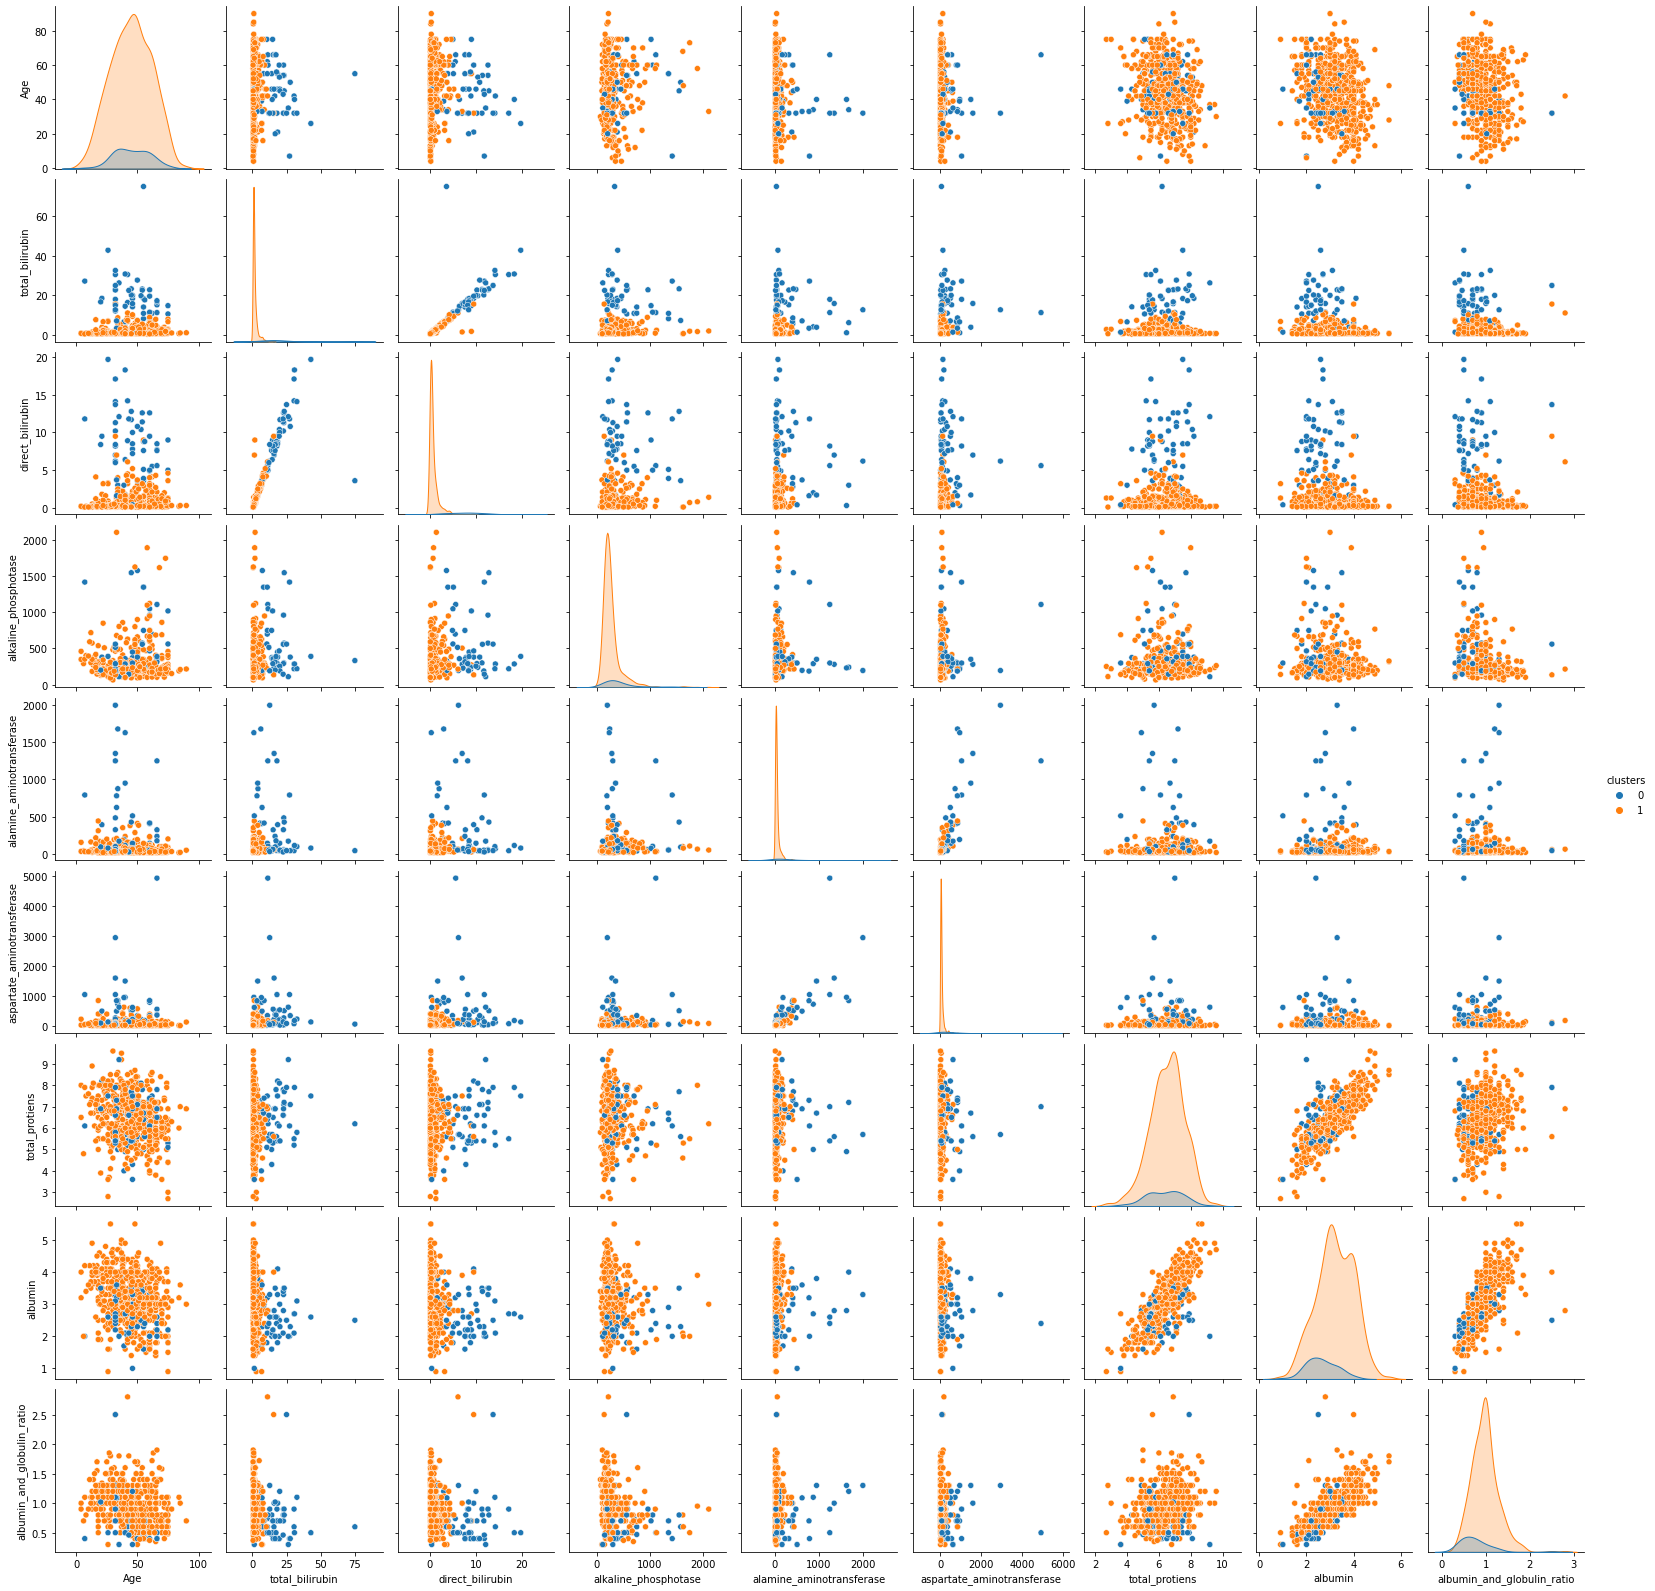

In [100]:
km = KMeans(n_clusters=2, random_state=0) # задаём число кластеров, равное 2, 
#и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
new_df['clusters']= labels # добавление столбца в датафрейм
sns.pairplot(new_df, hue = 'clusters') # матрица диаграммы рассеяния 

Диаграмма рассеяния по получившимся классам показывает корреляцию между значениями столбцов по получившимся кластерам.

Вычисляется евклидово расстояние между двумя одномерными массивами с помощью функции euclidean_distances библиотеки scipy. Данное значение наименьшее при значении числа классов, равном двум.

In [101]:
dists = euclidean_distances(km.cluster_centers_) # евклидово расстояние между двумя одномерными массивами 
print('Евклидово расстояние:', dists[np.triu_indices(2, 1)][0])

Евклидово расстояние: 4.355645820267794


Необходимо сравнить исходные средние значения столбца healthy с получившимися средними значениями по созданным кластерам.

In [102]:
df['clusters']= labels # добавление столбца в исходный датафрейм
df.describe() # создание описательной статистики

,Age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,healthy,clusters
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,44.906195,3.337876,1.505487,291.973451,80.221239,109.945133,6.493628,3.148142,0.949681,1.284956,0.893805
std,16.281109,6.292429,2.844085,245.807544,182.194655,292.095023,1.088395,0.794697,0.318974,0.451793,0.308360
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.960000,1.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000


По этим данным можно сделать вывод, что средние значения похожи, но не являются одинаковыми, так как значения кластеров заданы, как 0 и 1, а значения параметра здоровья заданы, как 1 и 2.

In [103]:
df['healthy'] = df['healthy'].replace(1, 1) # замена значений для анализа
df['healthy'] = df['healthy'].replace(2, 0)
df.describe() # создание описательной статистики

,Age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,healthy,clusters
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,44.906195,3.337876,1.505487,291.973451,80.221239,109.945133,6.493628,3.148142,0.949681,0.715044,0.893805
std,16.281109,6.292429,2.844085,245.807544,182.194655,292.095023,1.088395,0.794697,0.318974,0.451793,0.308360
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.960000,1.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000


Теперь значения по кластеру и параметру здоровья датасета стали очень близки, что означает, что кластеризация была произведена качественно. В получившихся кластерах значение 1 - пациент с заболеванием печени, а 0 - без заболевания.

Метрика силуэта показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой. На вход передаём нормализованную или стандартизованную матрицу признаков и метки, которые спрогнозировал алгоритм кластеризации, в виде 
списка. Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация.

In [104]:
silhouette_score(X_sc, labels)
# расчет Метрики силуэта

0.49004550119828305

Необходимо также произвести расчет Метрики силуэта для трех, четырех и пяти классов.

In [105]:
# расчет Метрики силуэта для трех классов
new_df2 = df.drop(columns = ['gender', 'healthy', 'clusters'], axis = 1)
X_sc = sc.fit_transform(new_df2) # стандартизация
km = KMeans(n_clusters=3, random_state=0)
# задаём число кластеров, равное 2, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
silhouette_score(X_sc, labels) # расчет Метрики силуэта

0.24452403760801952

In [106]:
# расчет Метрики силуэта для четырех классов
km = KMeans(n_clusters=4, random_state=0) 
# задаём число кластеров, равное 2, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
silhouette_score(X_sc, labels)

0.2603650320315964

In [107]:
# расчет Метрики силуэта для пяти классов
km = KMeans(n_clusters=5, random_state=0)
# задаём число кластеров, равное 2, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
silhouette_score(X_sc, labels) # расчет Метрики силуэта

0.2643249684116939

По данным значениям Метрики силуэта можно сделать вывод, что наиболее качественная кластеризация получается при определении двух кластеров.

# Иерархический агломеративный метод:

Подходящая метрика расстояния - алгоритм самой дальней точки (method = 'complete'). Это расстояние может оказаться полезным, когда необходимо определить два объекта как "различные", если они различаются по какой-либо одной координате (каким-либо одним измерением).

Построение дендрограммы осуществляется с помощью linkag с указанием подходящей метрики расстояния библиотеки scipy.

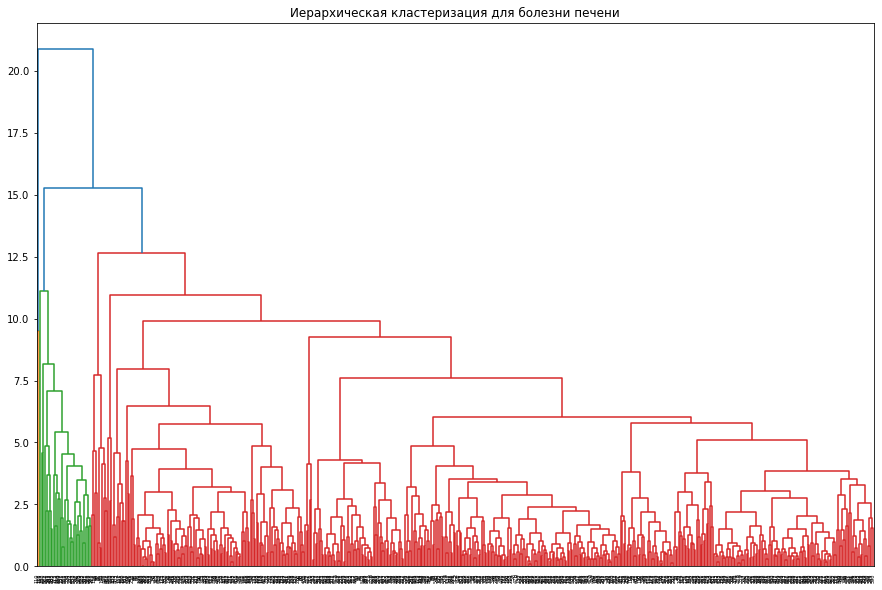

In [29]:
sc = StandardScaler() # создаётся объект класса scaler

# обязательная стандартизация данных перед работой с алгоритмами
X_sc = sc.fit_transform(new_df)
linked = linkage(X_sc, method = 'complete')
plt.figure(figsize=(15, 10)) # размер графика
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для болезни печени')
plt.show()

Предложенное оптимальное число кластеров 2 — разных цвета на графике. Данный вывод совпал с выводом по алгоритму k-means.

# Вывод:

Подводя итоги, можно сделать вывод, что иерархический агломеративный метод и алгоритм KMeans показали одинаковое значение кластеров. При выборе числа кластеров в алгоритме KMeans необходимо анализировать значения метрики силуэта. Для иерархического агломеративного метода необходимо подобрать подходящую метрику расстояния, в зависимости от исходных данных. Кластеризация выполнилась качественно, так как средние значения столбцов в исходном датасете совпали со средними значениями по новому кластеру.